## Homework 02: Monte Carlo Basics
### PHYS420 — Intro to Computational Physics — Fall 2025  
### Hayden Dauphin

In [1]:
import matplotlib.pyplot as plt
import random 
import numpy as np
import scipy.stats as scistat
import statistics

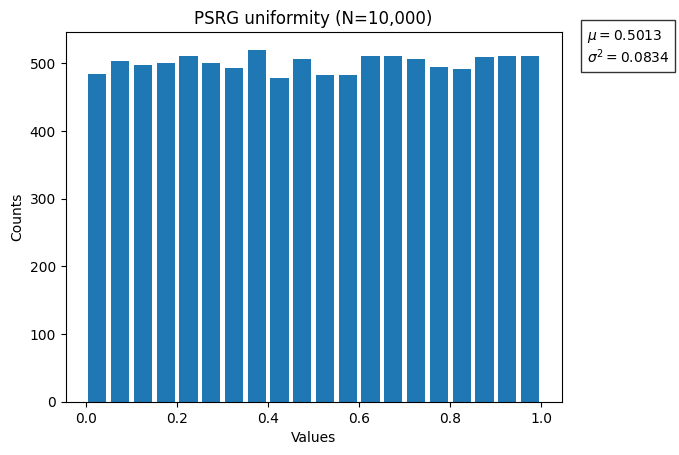

kth Moment Test:
k=2: Empirical moment = 0.3347, Theoretical moment = 0.3333, Percent error: 0.42%
k=3: Empirical moment = 0.2514, Theoretical moment = 0.2500, Percent error: 0.57%
k=4: Empirical moment = 0.2014, Theoretical moment = 0.2000, Percent error: 0.68%

Statistical Dependence (Accepted value = 0.25): 
C(1) = 0.250969, Percent error: 0.39%
C(2) = 0.251641, Percent error: 0.66%


In [31]:
''' 
Part A: Testing pseudo-random number generators 
'''
N = 10000 # number of values to generate
dataset = [random.random() for i in range(N)] # Uses Python's built in PRNG, random——module uses Mersenne Twister as core gen  
dataset = np.array(dataset)

# 1. Histogram and basic stats 
fig, ax = plt.subplots()
plt.rcParams['text.usetex'] = False

ax.hist(dataset, bins=20, rwidth=0.8) #Create a 20 bin histogram to sort the data in dataset
ax.set_title("PSRG uniformity (N=10,000)")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")
#plt.show()

#compute mean and variance; print the values in a box beside the histogram 
mean = np.mean(dataset)
variance = statistics.variance(dataset)
ax.text(1.1, 500, 
        fr"$\mu={mean:.4f}$" 
        + "\n" 
        + fr"$\sigma^2={variance:.4f}$",
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

plt.show()


# 2. Kth moment test

#Function to calculate percent error
def percent_error(actual, accepted):
    return(np.abs(((actual-accepted)/accepted)*100))

ks = [2,3,4] #k values to test

#compute moments for all k values 
print("kth Moment Test:")
for k in ks: 
    moment = np.mean(dataset**k)
    moment_th = 1/(k+1)
    error = percent_error(moment, moment_th)
    print (f"k={k}: Empirical moment = {moment:.4f}, Theoretical moment = {moment_th:.4f}, Percent error: {error:.2f}%")

# 3. Near-neighbor corelation test 

# Check statistical dependence between nearby values; function C(k)

def C(data, k): 
    N = len(data)
    return np.sum(data[:-k] * data[k:])/N 

lags = [1,2]
stat_dep = [C(dataset, k) for k in lags]

# Calculate percent errors; list the C(k) result and percent error for each lag value k 

errors = [percent_error(i, 0.25) for i in stat_dep]

print("\nStatistical Dependence (Accepted value = 0.25): ") 
for k, val, e in zip(lags, stat_dep, errors):
    print(f"C({k}) = {val:.6f}, Percent error: {e:.2f}%")

# 4. Autocorrelation test —— OPTIONAL 

# 5. Frequency (hisotgram) test —— OPTIONAL 

In [ ]:
"""
Part B: Sampling from non-uniform distributions (OPTIONAL)
"""

In [ ]:
""" 
Part C: Monte Carlo integration (1D)

Use crude Monte Carlo to compute test integrals and error estimates for N = [100, 1000, 10000, 100000, 1000000]; compare with true value
Plot error vs N on log-log scale and check 1/sqrt(N) behavior (OPTIONAL)
"""


